In [ ]:
import cv2
import os
from keras.models import load_model
import numpy as np
# from pygame import mixer
import time
import numpy as np

# mixer.init()
# sound = mixer.Sound('alarm.wav')

face = cv2.CascadeClassifier('haar cascade files\haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('haar cascade files\haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('haar cascade files\haarcascade_righteye_2splits.xml')



lbl=['Close','Open']

model = load_model('./model.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2] 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(gray)
    right_eye =  reye.detectMultiScale(gray)

    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )

    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
#         r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2RGB)
        r_eye = cv2.resize(r_eye,(100,100))
        r_eye= r_eye/255
#         r_eye=  r_eye.reshape(24,24,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        rpred = np.argmax(model.predict(r_eye))
        if(rpred==1):
            lbl='Open' 
        if(rpred==0):
            lbl='Closed'
        break

    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
#         l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2RGB)  
        l_eye = cv2.resize(l_eye,(100,100))
        l_eye= l_eye/255
#         l_eye=l_eye.reshape(24,24,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = np.argmax(model.predict(l_eye))
        if(lpred==1):
            lbl='Open'   
        if(lpred==0):
            lbl='Closed'
        break

    print(rpred, lpred, '\n')
    if(rpred==0 and lpred==0):
        score=score+1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    # if(rpred[0]==1 or lpred[0]==1):
    else:
        score=score-1
        cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    
        
    if(score<0):
        score=0   
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
#     if(score>15):
#         #person is feeling sleepy so we beep the alarm
#         cv2.imwrite(os.path.join(path,'image.jpg'),frame)
#         try:
#             sound.play()
            
#         except:  # isplaying = False
#             pass
#         if(thicc<16):
#             thicc= thicc+2
#         else:
#             thicc=thicc-2
#             if(thicc<2):
#                 thicc=2
#         cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


[99] [99] 

1/1 [==============================] - 0s 41ms/step
1 1 

1/1 [==============================] - 0s 42ms/step
1 1 

1/1 [==============================] - 0s 32ms/step
1 1 

1/1 [==============================] - 0s 50ms/step
1 0 

1/1 [==============================] - 0s 40ms/step
1 1 

1/1 [==============================] - 0s 48ms/step
1 1 

1/1 [==============================] - 0s 47ms/step
1 0 

1 0 

1/1 [==============================] - 0s 35ms/step
1 1 

1/1 [==============================] - 0s 30ms/step
1 1 

1 1 

1/1 [==============================] - 0s 35ms/step
1 0 

1/1 [==============================] - 0s 28ms/step
1 0 

1 0 

1 0 

1 0 

1/1 [==============================] - 0s 40ms/step
1 0 

1 0 

1/1 [==============================] - 0s 32ms/step
0 1 

1/1 [==============================] - 0s 32ms/step
0 0 

0 0 

0 0 

1/1 [==============================] - 0s 32ms/step
1 1 

1/1 [==============================] - 0s 32ms/step
1 1 

1 1 

1/1 [=

1/1 [==============================] - 0s 32ms/step
1 1 

1/1 [==============================] - 0s 24ms/step
1 1 

1/1 [==============================] - 0s 32ms/step
1 1 

1/1 [==============================] - 0s 25ms/step
1 1 

1/1 [==============================] - 0s 32ms/step
1 1 

1/1 [==============================] - 0s 32ms/step
1 1 

1/1 [==============================] - 0s 33ms/step
1 1 

1/1 [==============================] - 0s 32ms/step
1 1 

1/1 [==============================] - 0s 24ms/step
1 1 

1/1 [==============================] - 0s 24ms/step
1 1 

1/1 [==============================] - 0s 24ms/step
1 1 

1/1 [==============================] - 0s 32ms/step
1 1 

1/1 [==============================] - 0s 32ms/step
1 1 

1/1 [==============================] - 0s 24ms/step
1 1 

1/1 [==============================] - 0s 40ms/step
1 1 

1/1 [==============================] - 0s 33ms/step
1 1 

1/1 [==============================] - 0s 32ms/step
1 1 

1/1 [=========

In [2]:
cv2.destroyAllWindows()

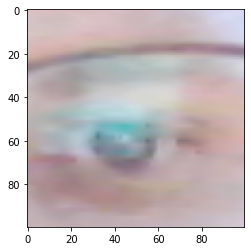

In [20]:
import matplotlib.pyplot as plt
plt.imshow(l_eye[0])

In [23]:
model.predict(l_eye)

1/1 [==============================] - 0s 20ms/step


array([[9.9998784e-01, 1.2147192e-05]], dtype=float32)

In [44]:
for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
#         count=count+1
#         l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2RGB)  
        l_eye = cv2.resize(l_eye,(100,100))
        l_eye= l_eye/255
# #         l_eye=l_eye.reshape(24,24,-1)
#         l_eye = np.expand_dims(l_eye,axis=0)
#         lpred = np.argmax(model.predict(l_eye))
#         if(lpred==1):
#             lbl='Open'   
#         if(lpred==0):
#             lbl='Closed'
#         break

1/1 [==============================] - 0s 21ms/step


array([[2.0008758e-14, 1.0000000e+00]], dtype=float32)

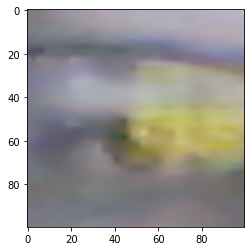

In [45]:
plt.imshow(l_eye)
model.predict(l_eye[np.newaxis, :])